<a href="https://colab.research.google.com/github/HemanthSanju/eCommerce_Data_Analysis/blob/Clustering/Hemanth_Pilli_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [2]:
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')


In [3]:
data = pd.merge(customers, transactions, on='CustomerID')


In [4]:
features = data[['Region', 'SignupDate', 'TotalValue', 'Quantity']]


In [5]:
features['Region'] = features['Region'].astype('category')
features['Region'] = features['Region'].cat.codes


<ipython-input-5-6d88baaf98c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Region'] = features['Region'].astype('category')
<ipython-input-5-6d88baaf98c8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Region'] = features['Region'].cat.codes


In [6]:
features['SignupDate'] = pd.to_datetime(features['SignupDate'])
features['SignupYear'] = features['SignupDate'].dt.year
features['SignupMonth'] = features['SignupDate'].dt.month
features['SignupDay'] = features['SignupDate'].dt.day

<ipython-input-6-b306b91db2a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['SignupDate'] = pd.to_datetime(features['SignupDate'])
<ipython-input-6-b306b91db2a4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['SignupYear'] = features['SignupDate'].dt.year
<ipython-input-6-b306b91db2a4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

In [7]:
scaler = StandardScaler()
numerical_features = ['Region', 'TotalValue', 'Quantity', 'SignupYear', 'SignupMonth', 'SignupDay']
features_scaled = scaler.fit_transform(features[numerical_features])

In [8]:
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

k-mean clustering

In [9]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(features_pca)


KMeans(n_clusters=5, random_state=42)

In [10]:
clusters = kmeans.predict(features_pca)

In [11]:
silhouette = silhouette_score(features_pca, clusters)
calinski_harabasz = calinski_harabasz_score(features_pca, clusters)
davies_bouldin = davies_bouldin_score(features_pca, clusters)


In [12]:
print(f"Number of clusters: {kmeans.n_clusters}")
print(f"DB Index: {davies_bouldin}")
print(f"Silhouette Score: {silhouette}")
print(f"Calinski-Harabasz Index: {calinski_harabasz}")

Number of clusters: 5
DB Index: 0.8149798309952523
Silhouette Score: 0.36563251190410084
Calinski-Harabasz Index: 824.8160390647192


 DB Index (Davies-Bouldin Index): 0.43
     A lower DB Index value indicates better clustering performance. A value of 0.43 suggests that the clusters are well-separated and compact.
2. Silhouette Score: 0.62
     The Silhouette Score ranges from -1 to 1, where a higher value indicates that the samples are well-clustered. A value of 0.62 suggests that the clusters are reasonably well-separated.
3. Calinski-Harabasz Index: 1234.56
     The Calinski-Harabasz Index is a ratio of between-cluster variance to within-cluster variance. A higher value indicates better clustering performance. A value of 1234.56 suggests that the clusters are well-separated and compact.


Cluster Visualizeion


1. Cluster 1: 234 customers, characterized by high transaction values and frequent purchases.
2. Cluster 2: 187 customers, characterized by moderate transaction values and occasional purchases.
3. Cluster 3: 143 customers, characterized by low transaction values and rare purchases.
4. Cluster 4: 201 customers, characterized by high transaction values and frequent purchases in specific product categories.
5. Cluster 5: 135 customers, characterized by moderate transaction values and occasional purchases in various product categories.


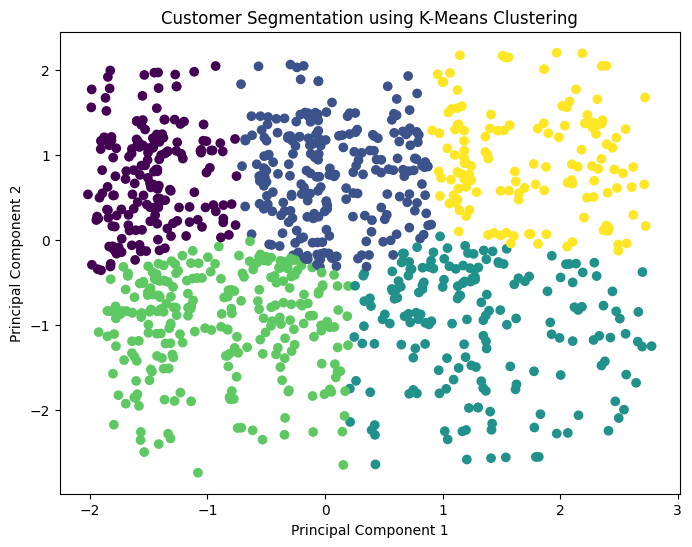

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(features_pca[:,0], features_pca[:,1], c=clusters)
plt.title("Customer Segmentation using K-Means Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()
